In [1]:
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [4]:
x_test.dtype

dtype('uint8')

In [5]:
import matplotlib.pyplot as plt

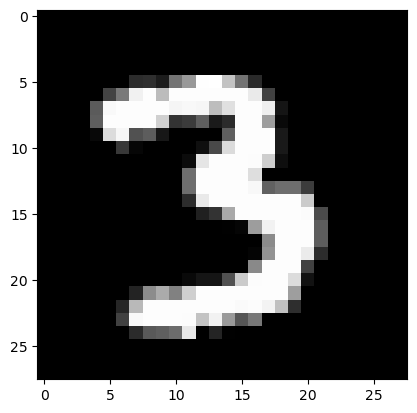

In [6]:
plt.imshow(x_test[500], cmap=plt.cm.gray)

#Add two layer net in Keras

In [7]:
from tensorflow import keras

In [8]:
model = keras.Sequential([
    keras.layers.Dense(100, activation="sigmoid", input_shape=(784, )),
    keras.layers.Dense(10, activation="softmax")
])

: 

In [ ]:
model

In [ ]:
model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
keras.utils.to_categorical(y_train, num_classes=10)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])

In [ ]:
x_train.shape

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test =  keras.utils.to_categorical(y_test, num_classes=10)

In [ ]:
y_train[0]

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=32)

In [ ]:
predictions = model.predict(x_test[0:10])

In [ ]:
import numpy as np

In [ ]:
predictions = np.argmax(predictions, axis=1)

In [ ]:
predictions

In [ ]:
labels = np.argmax(y_test[0:10], axis=1)

In [ ]:
labels

In [ ]:
predictions == labels

#LeNet

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import os
import numpy as np
from PIL import Image


In [7]:
class LeNet:
    def __init__(self, batch_size=32, epochs=20):
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None
        self._create_lenet()
        self._compile()
    

    def _create_lenet(self):
        self.model = Sequential([
            Conv2D(filters=6, kernel_size=(5,5), 
                   activation='sigmoid', input_shape=(28, 28, 1), 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),
            
            Conv2D(filters=16, kernel_size=(5,5), 
                   activation='sigmoid', 
                   padding='same'),
            AveragePooling2D(pool_size=(2, 2), strides=2),

            Flatten(),

            Dense(120, activation='sigmoid'),
            Dense(84, activation='sigmoid'),
            Dense(10, activation='softmax')
        ])

    def _compile(self):
        if self.model is None:
            print('Error: Create a model first..')
        
        self.model.compile(optimizer='Adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])
        

    def _preprocess(self):
        # load mnist data
        (x_train, y_train), (x_test, y_test) = mnist.load_data()

        # normalize
        x_train = x_train/255.0
        x_test = x_test/255.0

        # add channel dim
        self.x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  
        self.x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)  

        # one-hot encoding
        self.y_train = to_categorical(y_train, 10)
        self.y_test = to_categorical(y_test, 10)

    def train(self):
        self._preprocess()
        self.model.fit(self.x_train, self.y_train, 
                  batch_size=self.batch_size, 
                  epochs=self.epochs)

    def save(self, model_path_name):
     
        try:
            # Ensure the directory exists
            directory = os.path.dirname(model_path_name)
            if directory and not os.path.exists(directory):
                os.makedirs(directory)
                
            # Save the model as a .keras file
            self.model.save(model_path_name)
            print(f"Model saved to {model_path_name}")
        except Exception as e:
            print(f"Error saving model: {e}")
    
    def load(self, model_path_name):
    
        try:
            # Load the model from the .keras file
            self.model = tensorflow.keras.models.load_model(model_path_name)
            print(f"Model loaded from {model_path_name}")
            return self.model
        except Exception as e:
            print(f"Error loading model: {e}")
            return None

    def predict(self, images):
            """
            Predict the class labels for the input images.

            Args:
                images (list or np.array): A list or array of image data.

            Returns:
                list: Predicted class probabilities or class labels.
            """
            try:
                # If images is a list, convert it to a numpy array
                if isinstance(images, list):
                    images = np.array(images)
                
                # Ensure the images are in the correct format (e.g., resized, normalized)
                # If images are raw (e.g., not preprocessed), preprocess them
                
                # Preprocessing images (e.g., resizing to match input shape of model)
                processed_images = []
                for img in images:
                    # If the image is a PIL image or a numpy array, resize it to the expected input size
                    # Assuming the model was trained on images of size (32, 32, 3)
                    if isinstance(img, np.ndarray):
                        img = image.array_to_img(img)  # Convert numpy array to a PIL image if needed
                    
                    # Resize the image to match model's input size (e.g., 32x32)
                    img = img.resize((28, 28))  # Change the size if your model needs a different size
                    img = image.img_to_array(img)  # Convert PIL image back to a numpy array
                    
                    # Normalize the image (if needed, e.g., values between 0 and 1)
                    img = img / 255.0  # Assuming the model was trained with normalized images

                    # Append to the list of processed images
                    processed_images.append(img)

                # Convert list of images into a numpy array for prediction
                processed_images = np.array(processed_images)

                # Make predictions with the model
                predictions = self.model.predict(processed_images)
                
                # If model outputs class probabilities, you can get the predicted class labels:
                predicted_labels = np.argmax(predictions, axis=-1)
                
                return predicted_labels  # or return predictions if you need probabilities

            except Exception as e:
                print(f"Error making predictions: {e}")
                return None


In [4]:
lenet = LeNet(batch_size=64, epochs=10)

In [5]:
lenet.train()

Epoch 1/10
938/938 [==============================] - 61s 65ms/step - loss: 1.0422 - accuracy: 0.6547
Epoch 2/10
938/938 [==============================] - 27s 29ms/step - loss: 0.2576 - accuracy: 0.9212
Epoch 3/10
938/938 [==============================] - 61s 65ms/step - loss: 0.1714 - accuracy: 0.9479
Epoch 4/10
938/938 [==============================] - 49s 53ms/step - loss: 0.1274 - accuracy: 0.9600
Epoch 5/10
938/938 [==============================] - 35s 38ms/step - loss: 0.1034 - accuracy: 0.9682
Epoch 6/10
938/938 [==============================] - 41s 44ms/step - loss: 0.0864 - accuracy: 0.9736
Epoch 7/10
938/938 [==============================] - 44s 47ms/step - loss: 0.0736 - accuracy: 0.9770
Epoch 8/10
938/938 [==============================] - 48s 51ms/step - loss: 0.0634 - accuracy: 0.9801
Epoch 9/10
938/938 [==============================] - 21s 23ms/step - loss: 0.0574 - accuracy: 0.9818
Epoch 10/10
938/938 [==============================] - 55s 59ms/step - loss: 0.052

In [7]:
x_test = x_test.reshape(-1,28,28,1)

NameError: name 'x_test' is not defined

In [ ]:
predictions = np.argmax(lenet.model.predict(x_test[0:10]), axis=1)

In [ ]:
print(predictions)

In [ ]:
labels = np.argmax(lenet.y_test[0:10], axis=1)

In [ ]:
print(labels)

In [ ]:
print(predictions == labels)

In [6]:
import tensorflow

In [10]:
model_saver = LeNet()

In [11]:
model_saver.save('Moore_cnn_model.keras')

Model saved to Moore_cnn_model.keras


In [15]:
model_loader = LeNet()

In [16]:
model_load = model_loader.load('Moore_cnn_model.keras')

Model loaded from Moore_cnn_model.keras


In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def increase_contrast(image):

    # Find the minimum and maximum pixel values in the image
    min_pixel = np.min(image)
    max_pixel = np.max(image)
    
    # Apply contrast stretching (stretching pixel values to full [0, 255] range)
    contrast_image = (image - min_pixel) * (255.0 / (max_pixel - min_pixel))
    
    # Clip values to ensure they remain within the valid range [0, 255]
    contrast_image = np.clip(contrast_image, 0, 255)
    
    return contrast_image

def load_images_from_subfolders(image_folder, target_size=(28, 28)):
    # List to hold all image arrays
    image_arrays = []

    # Loop through the folders and files recursively
    for subdir, _, files in os.walk(image_folder):
        for filename in files:
            # Only process files that end with '.PNG' (case-sensitive)
            if filename.endswith('.png'):
                print(f"Processing file: {filename}")  # Debugging line
                # Create the full path to the image file
                image_path = os.path.join(subdir, filename)

                try:
                    # Open the image using PIL and convert it to grayscale ('L' mode)
                    image = Image.open(image_path).convert('L')  # Convert to grayscale

                    # Resize the image to the target size (e.g., 28x28)
                    image = image.resize(target_size)

                    # Convert the resized image to a numpy array
                    image = np.array(image)

                    # Invert the image colors (255 - pixel value)
                    image = 255.0 - image

                    # Increase the contrast of the image
                    image = increase_contrast(image)

                    # Normalize the image to range [0, 255]
                    image = (image - np.min(image)) * (255 / (np.max(image) - np.min(image)))

                    # Convert to float32 and scale the values to [0, 1]
                    image = image.astype(np.float32) / 255.0

                    # Flatten the image
                    image = image.flatten()

                    # Append the processed image to the list
                    image_arrays.append(image)
                except Exception as e:
                    print(f"Failed to process {filename}: {e}")  # Print any error

    # Convert the list of image arrays into a single NumPy array (shape: num_images, flattened_pixels)
    if len(image_arrays) == 0:
        print("No images were processed.")
    else:
        print(f"Processed {len(image_arrays)} images.")

    images_numpy = np.array(image_arrays)

    return images_numpy

def display_image(image_numpy, index=0):

    # Check if the image_numpy array has any images
    if image_numpy.size == 0:
        print("No images to display.")
        return

    # Select an image by index from the numpy array
    img_to_display = image_numpy[index].reshape(28, 28)  # Grayscale images have shape (28, 28)

    # Display the image using matplotlib
    plt.imshow(img_to_display, cmap='gray')  # Use 'gray' colormap for grayscale images
    plt.axis('off')  # Hide the axes for better presentation
    plt.show()


image_folder = 'Custom MNIST Sample'
images = load_images_from_subfolders(image_folder)


#display_image(images, index=0)

# Access the image_numpy array directly
#print("Shape of image_numpy:", images.shape)  # Prints the shape of the image_numpy array

# Access the first image (flattened) directly:
#first_image = images[0]
#print("First image (flattened):", first_image)

# Access the first image in original shape (28x28)
#first_image_reshaped = first_image.reshape(28, 28)
#print("First image reshaped (28x28):\n", first_image_reshaped)


Processing file: 0_0.png
Processing file: 0_1.png
Processing file: 0_2.png
Processing file: 0_3.png
Processing file: 0_4.png
Processing file: 1_0.png
Processing file: 1_1.png
Processing file: 1_2.png
Processing file: 1_3.png
Processing file: 1_4.png
Processing file: 2_0.png
Processing file: 2_1.png
Processing file: 2_2.png
Processing file: 2_3.png
Processing file: 2_4.png
Processing file: 3_0.png
Processing file: 3_1.png
Processing file: 3_2.png
Processing file: 3_3.png
Processing file: 3_4.png
Processing file: 4_0.png
Processing file: 4_1.png
Processing file: 4_2.png
Processing file: 4_3.png
Processing file: 4_4.png
Processing file: 5_0.png
Processing file: 5_1.png
Processing file: 5_2.png
Processing file: 5_3.png
Processing file: 5_4.png
Processing file: 6_0.png
Processing file: 6_1.png
Processing file: 6_2.png
Processing file: 6_3.png
Processing file: 6_4.png
Processing file: 7_0.png
Processing file: 7_1.png
Processing file: 7_2.png
Processing file: 7_3.png
Processing file: 7_4.png


In [10]:
images = images.reshape(-1,28,28,1)

In [13]:
predictions = np.argmax(lenet.model.predict(images[0:50]), axis=1)

2/2 [==============================] - 0s 5ms/step


In [14]:
print(predictions)

[0 3 8 8 0 5 5 5 3 3 2 2 2 5 2 3 3 3 3 3 4 8 4 4 4 5 5 3 5 5 5 6 8 5 6 3 3
 3 8 3 3 8 5 5 8 8 3 8 3 8]


In [2]:
print(tf.__version__)

2.10.0
